In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\greenhouse_gas_emissions.csv")

In [9]:
datafr = df.groupby(by  = 'Fiscal Year').sum().reset_index()[["Fiscal Year","Emissions"]]

<Axes: xlabel='Emissions', ylabel='Count'>

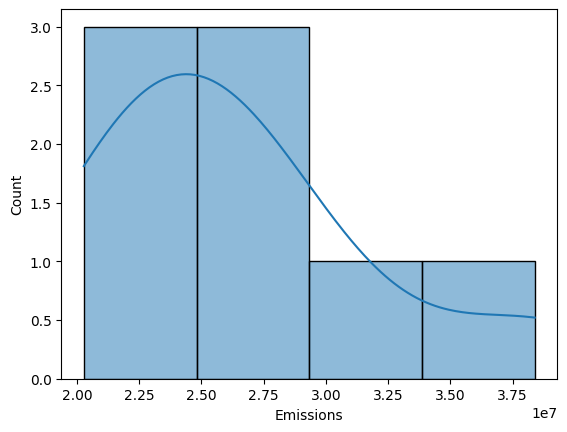

In [19]:
sns.histplot(x = datafr['Emissions'],kde = True)

In [21]:
datafr.describe()

,Fiscal Year,Emissions
count,8.00000,8.000000e+00
mean,2018.50000,2.635910e+07
std,2.44949,5.678657e+06
min,2015.00000,2.027990e+07
25%,2016.75000,2.252318e+07
50%,2018.50000,2.508495e+07
75%,2020.25000,2.795707e+07
max,2022.00000,3.838347e+07


In [26]:
datafr.median()[0]

2018.5

In [61]:
df.columns

Index(['Fiscal Year', 'Revenue', 'Market Capitalization', 'Employees',
       'sales_to_mc_ratio', 'gross_emissions', 'price_to_sales_ratio',
       'revenue_increase_pc', 'gross_pc_reduction_from_previous_year',
       'gross_pc_reduction_from_previous_year_positive', 'increase_in_revenue',
       'revenue_increase_baseline', 'gross_emissions_from_baseline', 'Column',
       'increase_in_revenue_previous_year_adjust'],
      dtype='object')

In [135]:
df_1 = df[['Fiscal Year','sales_to_mc_ratio','price_to_sales_ratio','revenue_increase_pc','gross_emissions_from_baseline','gross_pc_reduction_from_previous_year_positive']]

In [136]:
df_1

,Fiscal Year,sales_to_mc_ratio,price_to_sales_ratio,revenue_increase_pc,gross_emissions_from_baseline,gross_pc_reduction_from_previous_year_positive
0,2015,0.402957,2.481655,0.00,0,0
1,2016,0.359398,2.782428,-0.08,8804100,8804100
2,2017,0.309776,3.228142,0.06,10967170,2163070
3,2018,0.319994,3.125059,0.14,13247300,2280130
4,2019,0.238692,4.189504,-0.02,13349740,102440
5,2020,0.159602,6.265596,0.05,15789030,2439290
6,2021,0.149313,6.697338,0.25,15197070,591960
7,2022,0.158365,6.314540,0.07,17779470,2582400


In [122]:
df_12 = pd.DataFrame(df_1['price_to_sales_ratio'][:7])

In [123]:
df_11 = pd.DataFrame(df_1[['Fiscal Year','gross_pc_reduction_from_previous_year_positive']][1:]).reset_index(drop = True)

In [124]:
df_3 = df_11.merge(df_12,left_index = True,right_index = True)

In [125]:
df_3.sort_values(by = 'price_to_sales_ratio',ascending = True)

,Fiscal Year,gross_pc_reduction_from_previous_year_positive,price_to_sales_ratio
0,2016,8804100,2.481655
1,2017,2163070,2.782428
3,2019,102440,3.125059
2,2018,2280130,3.228142
4,2020,2439290,4.189504
5,2021,591960,6.265596
6,2022,2582400,6.697338


In [126]:
df_4 = df_3.sort_values(by = 'price_to_sales_ratio',ascending = True)

In [127]:
X = df_4['price_to_sales_ratio']
Y = df_4['gross_pc_reduction_from_previous_year_positive']

In [152]:
X = (df['Employees']/df['Market Capitalization'])
Y = df['gross_pc_reduction_from_previous_year_positive']

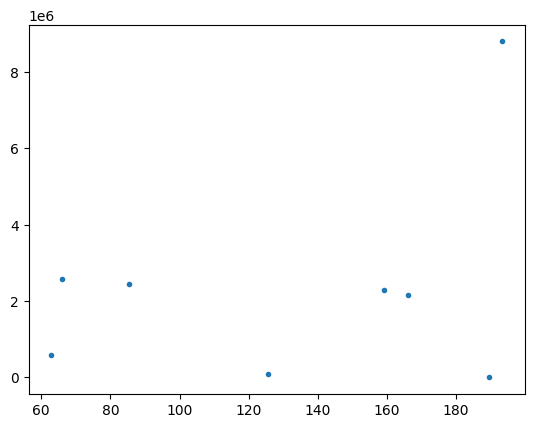

In [153]:
plt.plot(X,Y,'.')

In [129]:
f_2order = np.polyfit(X, Y, 2) 
p_2order = np.poly1d(f_2order)
f_3order = np.polyfit(X, Y, 3) 
p_3order = np.poly1d(f_3order)

In [65]:
X1 = df[['price_to_sales_ratio']].iloc[[1,2,3,4,6,7]]
Y1 = df[['baseline_reduction_Rate']].iloc[[1,2,3,4,6,7]]

In [52]:
X1 = df[['sales_to_mc_ratio']]
Y1 = df[['reduction_rate']]

<Axes: xlabel='price_to_sales_ratio', ylabel='baseline_reduction_Rate'>

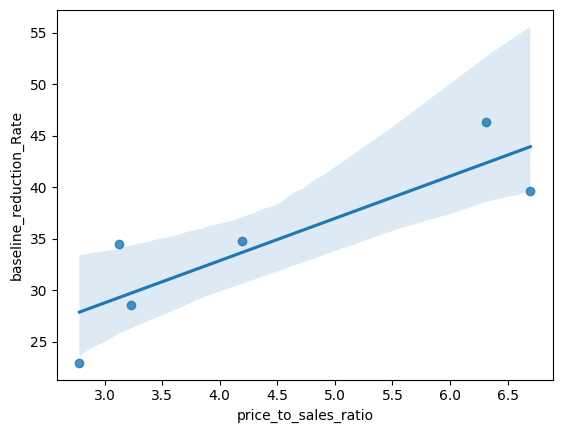

In [66]:
sns.regplot(x = X1, y = Y1)

In [46]:
from scipy import stats

In [67]:
correlation_coefficient, p_value = stats.pearsonr(list(X1["price_to_sales_ratio"]), list(Y1["baseline_reduction_Rate"]))


In [68]:
p_value

0.029199584087799272

In [69]:
correlation_coefficient

0.8570296579387285

In [72]:
lm = LinearRegression()
lm.fit(X1,Y1)
lm.score(X1, Y1)

0.7344998345865741

In [24]:
X2 = df[['price_to_sales_ratio']]

In [70]:
Y2 = lm.predict(df[['price_to_sales_ratio']][5:6])

In [71]:
Y2

array([[41.70718326]])

In [40]:
np.array(6.9)

array(6.9)

In [73]:
lm.predict([[6.9]])

D:\Python_venv\general\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[44.7514558]])

In [74]:
a = lm.intercept_
b = lm.coef_

In [81]:
"Y =" + str(round(a[0],3)) + " + "+ str(round(b[0][0],3)) + " X"

'Y =16.446 + 4.102 X'

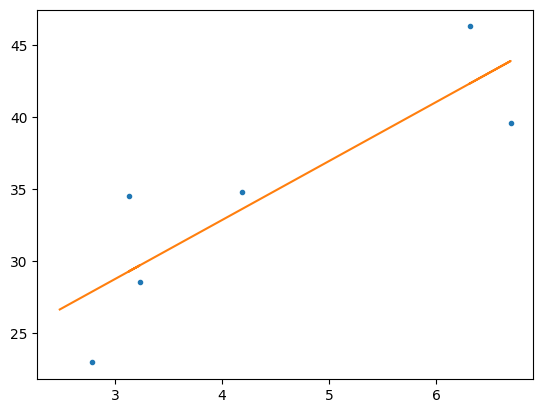

In [25]:
plt.plot(X1,Y1,'.')
plt.plot(X2,Y2,'-')

In [26]:
Y1

,baseline_reduction_Rate
1,22.937217
2,28.572638
3,34.513034
4,34.779920
6,39.592747
7,46.320643


In [27]:
Y2

array([[26.62618556],
       [27.86003953],
       [29.6884829 ],
       [29.26560557],
       [33.63225313],
       [42.14895427],
       [43.92007929],
       [42.34973808]])

In [17]:
X = dain_sorted['sales_to_mc_ratio'][1:]
Y = dain_sorted['gross_emissions_from_baseline'][0:7]

In [19]:
X

1    0.158365
2    0.159602
3    0.238692
4    0.309776
5    0.319994
6    0.359398
7    0.402957
Name: sales_to_mc_ratio, dtype: float64

In [20]:
import numpy as np

In [21]:
f_2order = np.polyfit(X, Y, 2) 

In [22]:
f_2order

array([-81446783.3723708 ,  16346953.99405621,  15990786.64020414])

In [23]:
p_2order = np.poly1d(f_2order)

In [24]:
p_2order

poly1d([-81446783.3723708 ,  16346953.99405621,  15990786.64020414])

In [25]:
f_3order = np.polyfit(X, Y, 3) 

In [26]:
f_3order

array([ -4786546.72167687, -77383143.7469142 ,  15259148.6368755 ,
        16080822.67346279])

In [27]:
p_3order = np.poly1d(f_3order)

In [28]:
f_4order = np.polyfit(X, Y, 4) 

In [29]:
f_4order

array([-6.47264518e+10,  7.36167528e+10, -3.04286689e+10,  5.36272575e+09,
       -3.21482386e+08])

In [30]:
p_4order = np.poly1d(f_4order)

In [31]:
import matplotlib.pyplot as plt

In [70]:
X = np.sort(X)

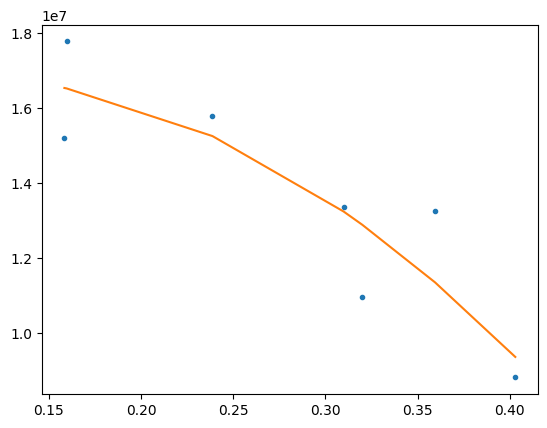

In [35]:
plt.plot(X,Y,'.')
plt.plot(X,p_2order(X),'-')
plt.plot(X,p_3order(X),'-')
#plt.plot(X,p_4order(X),'-')

In [53]:
x1 = [0.42,0.45,0.48,0.5,0.8]

In [54]:
x2 = list(X).copy()

In [55]:
x2.extend(x1)

In [41]:
x3 = np.array(x2)

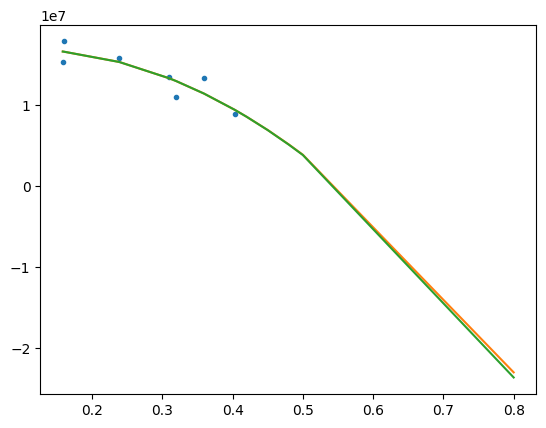

In [56]:
plt.plot(X,Y,'.')
plt.plot(np.array(x2),p_2order(np.array(x2)),'-')
plt.plot(np.array(x2),p_3order(np.array(x2)),'-')

In [48]:
p_2order(np.array(x2))

array([ 16536932.80895646,  16525118.16876288,  15252341.05615276,
        13238963.07396905,  12881876.83063565,  11345604.81234603,
         9353043.24917718,   8489294.73082154,   6853942.30462435,
         5071985.66835689,   3802567.79413955, -49109042.73811044])

In [87]:
dain_sorted_2 = dain_sorted.sort_values(by = 'price_to_sales_ratio',ascending = True).reset_index(drop=True).copy()

In [88]:
dain_sorted_2

,sales_to_mc_ratio,gross_emissions,price_to_sales_ratio,gross_emissions_from_baseline
0,0.402957,38383470,2.481655,0
1,0.359398,29579370,2.782428,8804100
2,0.319994,25136170,3.125059,13247300
3,0.309776,27416300,3.228142,10967170
4,0.238692,25033730,4.189504,13349740
5,0.159602,22594440,6.265596,15789030
6,0.158365,20604000,6.314540,17779470
7,0.149313,23186400,6.697338,15197070


In [146]:
X1 = dain_sorted_2[['price_to_sales_ratio']][1:]
Y1 = dain_sorted_2[['gross_emissions_from_baseline']][1:]

In [144]:
X1

1    2.782428
2    3.125059
3    3.228142
4    4.189504
5    6.265596
6    6.314540
7    6.697338
Name: price_to_sales_ratio, dtype: float64

In [132]:
f_2order_2 = np.polyfit(X1, Y1, 1) 
p_2order_2 = np.poly1d(f_2order_2)

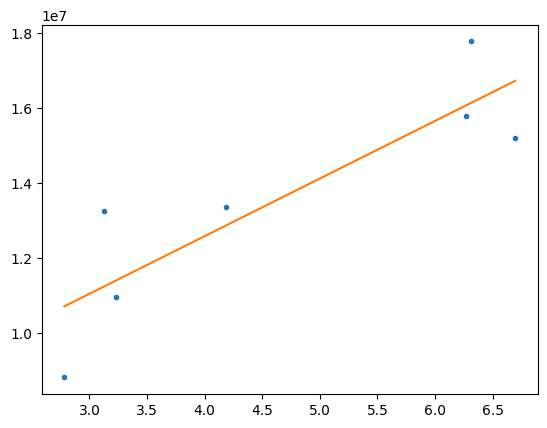

In [133]:
plt.plot(X1,Y1,'.')
plt.plot(X1,p_2order_2(X1),'-')
#plt.plot(X1,p_3order(X1),'-')

In [117]:
x1 = [6.8,7.0,7.3,7.6,7.9]

In [118]:
x2 =  list(X1).copy()

In [119]:
x2.extend(x1)

In [120]:
x2

[2.481655007,
 2.782428039,
 3.12505883,
 3.228142422,
 4.189503947,
 6.265595687,
 6.31454018,
 6.69733774,
 6.8,
 7.0,
 7.3,
 7.6,
 7.9]

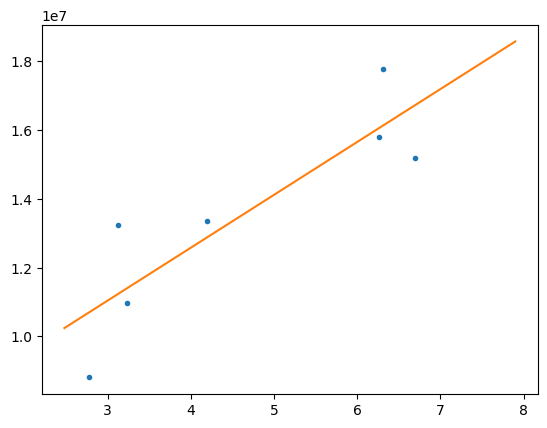

In [134]:
plt.plot(X1,Y1,'.')
plt.plot(x2,p_2order_2(x2),'-')
#plt.plot(X1,p_3order(X1),'-')

In [135]:
p_2order_2(x2)

array([10241745.056967  , 10704656.91092357, 11231990.93960875,
       11390644.18178248, 12870250.3914917 , 16065508.52336878,
       16140837.70379741, 16729991.34902732, 16887996.13021386,
       17195810.86405381, 17657532.96481373, 18119255.06557366,
       18580977.16633358])

In [136]:
Y1

1     8804100
2    13247300
3    10967170
4    13349740
5    15789030
6    17779470
7    15197070
Name: gross_emissions_from_baseline, dtype: int64

In [137]:
import seaborn as sns

<Axes: xlabel='price_to_sales_ratio', ylabel='gross_emissions_from_baseline'>

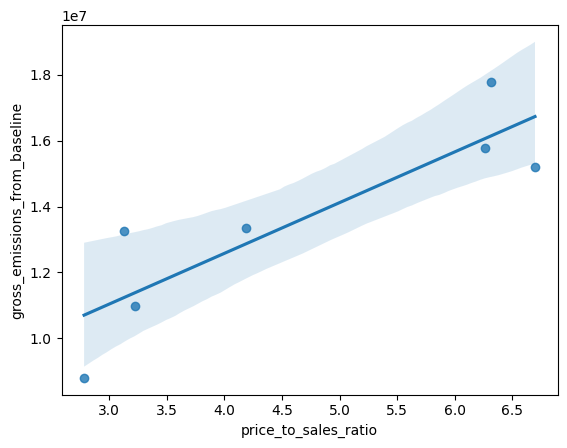

In [139]:
sns.regplot(x = X1, y = Y1)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lm = LinearRegression()

In [147]:
lm = LinearRegression()
lm.fit(X1,Y1)
lm.score(X1, Y1)

LinearRegression()

In [148]:
lm.score(X1, Y1)

0.7597961378573843

In [83]:
def func(a=[]):
    a.append(1)
    return a

In [85]:
print(func())
print(func())

[1, 1]
[1, 1, 1]


In [86]:
func()

[1, 1, 1, 1]

In [28]:
import json
import pandas as pd

In [67]:
greenhouse_gas_emissions = pd.read_csv(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\greenhouse_gas_emissions.csv")

In [68]:
greenhouse_gas_emissions_json = greenhouse_gas_emissions.to_json(orient = "records")

In [78]:
greenhouse_gas_emissions_json

'[{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 1","Description":"Natural gas, diesel, propane","Emissions":39700.0},{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 1","Description":"Fleet vehicles","Emissions":12600.0},{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 1","Description":"Other (R&D processes & refrigerant leaks)","Emissions":2900.0},{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 2 (market-based)","Description":"Electricity","Emissions":0.0},{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 2 (market-based)","Description":"Steam, heating, and cooling","Emissions":3000.0},{"Fiscal Year":2022,"Category":"Corporate emissions","Type":"Gross emissions","Scope":"Scope 3","Description":"Business travel","Emissions":113500.0},{"Fiscal Year":2022,"Category":"C

In [70]:
json.loads(greenhouse_gas_emissions_json)

[{'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 'Gross emissions',
  'Scope': 'Scope 1',
  'Description': 'Natural gas, diesel, propane',
  'Emissions': 39700.0},
 {'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 'Gross emissions',
  'Scope': 'Scope 1',
  'Description': 'Fleet vehicles',
  'Emissions': 12600.0},
 {'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 'Gross emissions',
  'Scope': 'Scope 1',
  'Description': 'Other (R&D processes & refrigerant leaks)',
  'Emissions': 2900.0},
 {'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 'Gross emissions',
  'Scope': 'Scope 2 (market-based)',
  'Description': 'Electricity',
  'Emissions': 0.0},
 {'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 'Gross emissions',
  'Scope': 'Scope 2 (market-based)',
  'Description': 'Steam, heating, and cooling',
  'Emissions': 3000.0},
 {'Fiscal Year': 2022,
  'Category': 'Corporate emissions',
  'Type': 

In [79]:
with open(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\greenhouse_gas_emissions.json","w") as f:
    for i in json.loads(greenhouse_gas_emissions_json):
        f.write(json.dumps(i))

* file 2

In [80]:
carbon_footprint_by_products = pd.read_csv(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\carbon_footprint_by_products.csv")
carbon_footprint_by_products_json = carbon_footprint_by_products.to_json(orient = "records")

In [84]:
with open(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\carbon_footprint_by_products.json","w") as f:
    for i in json.loads(carbon_footprint_by_products_json):
        f.write(json.dumps(i))

* file 3

In [85]:
normalizing_factors = pd.read_csv(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\normalizing_factors.csv")
normalizing_factors_json = normalizing_factors.to_json(orient = "records")

In [86]:
with open(r"C:\Users\pryns\OneDrive\Desktop\Apple_Emissions\apple_emissions\normalizing_factors.json","w") as f:
    for i in json.loads(normalizing_factors_json):
        f.write(json.dumps(i))